# IRIS FLOWER CLASSIFICATION
1. The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
2. Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv("IRIS.csv")

In [3]:
# reading the first 10 rows of the data
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# looking into data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# looking into statistical information of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# looking unique values in species column
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# applying one hot encoding to the species column
df['species'] = df['species'].map({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2})

In [12]:
# finding correlation between columns
df.corr(method = "spearman")

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.159457,0.881386,0.834421,0.500250
sepal_width,-0.159457,1.000000,-0.303421,-0.277511,-0.633199
petal_length,0.881386,-0.303421,1.000000,0.936003,0.480321
petal_width,0.834421,-0.277511,0.936003,1.000000,0.482848
species,0.500250,-0.633199,0.480321,0.482848,1.000000


/Users/vishalparmar17/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


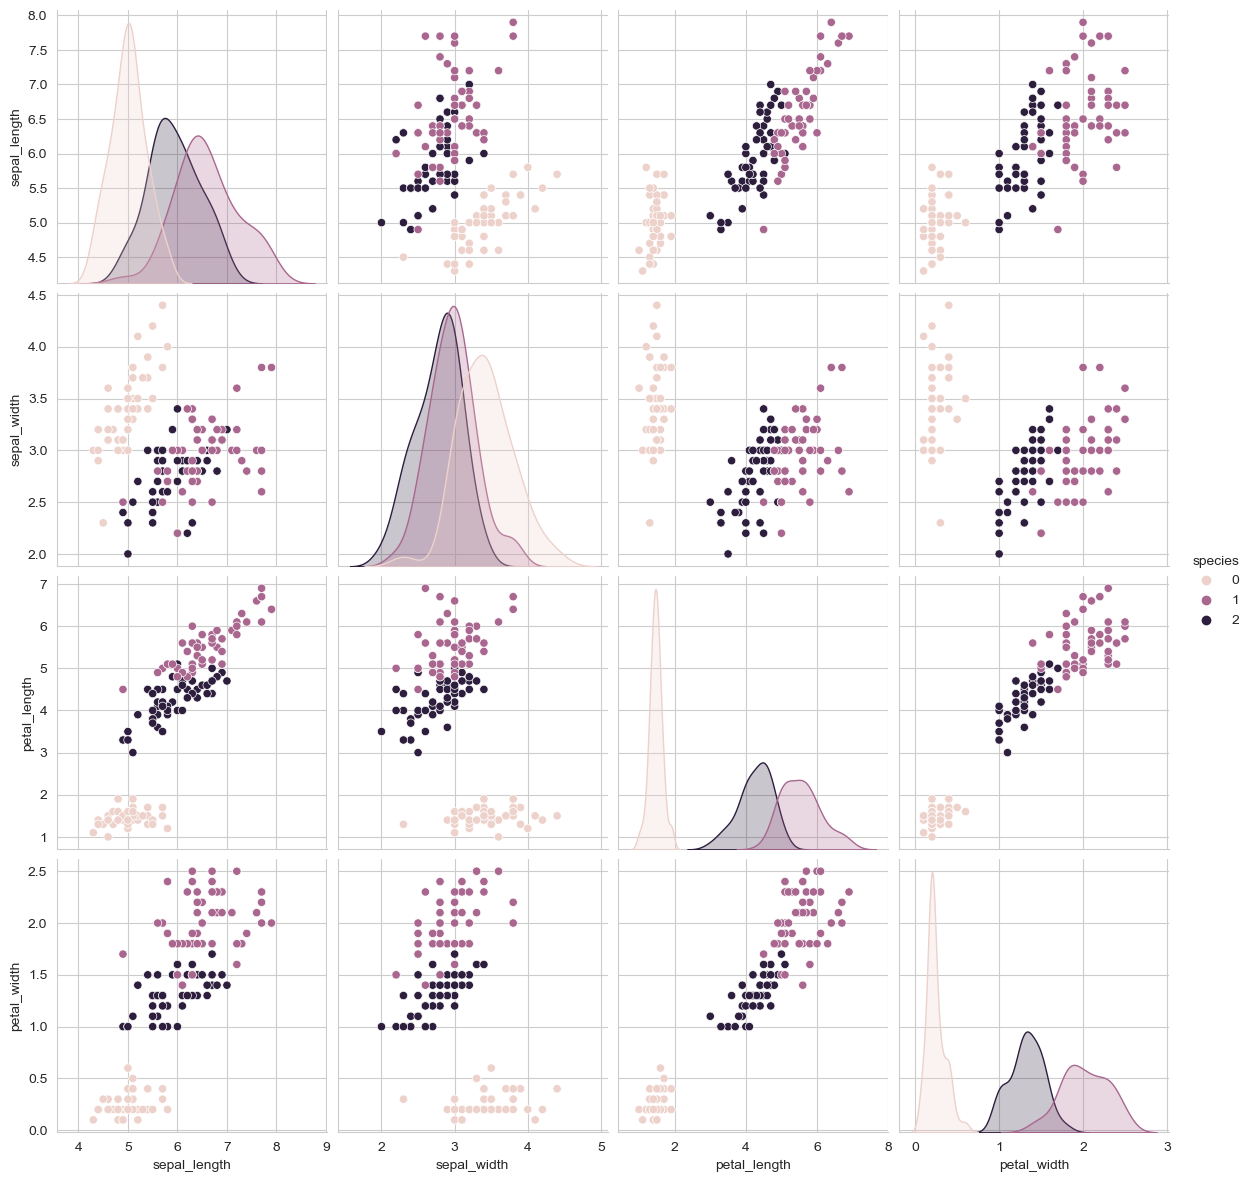

In [13]:
# observing the correlation of each columns with one another using seaborn
sns.set_style('whitegrid')
sns.pairplot(data = df, hue= 'species',size = 3)
plt.show()

In [15]:
# looking column names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
# copying data such that original is not affected and selecting columns that are relevent
data = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']].copy(deep= True)

In [18]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


In [19]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']


In [20]:
# gives frequency of unique values in a column/s to find if data is balanced or imbalanced
data['species'].value_counts()

0    50
2    50
1    50
Name: species, dtype: int64

In [21]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
# importing classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
# KNeighbhors algorithm where we have kept value of k in a loop to get an optimum value with least misclassified data
missclassified=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kpred = knn.predict(x_test)
    missclassified.append((y_test != kpred).sum())
print(missclassified)

[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
kcm = confusion_matrix(y_test,kpred)
kacc = accuracy_score(y_test,kpred)
print(f'The confusion matrix is:\n{kcm}\nThe accuracy is: {round((kacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [26]:
# Decision Tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred = dtc.predict(x_test)
dcm = confusion_matrix(y_test,dpred)
dacc = accuracy_score(y_test,dpred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {round((dacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [27]:
# Random Forest algorithm
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rpred = rfc.predict(x_test)
rcm = confusion_matrix(y_test,rpred)
racc = accuracy_score(y_test,rpred)
print(f'The confusion matrix is:\n{rcm}\nThe accuracy is: {round((racc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [28]:
# Naives Bayes - Gaussian theorem algorithm
nb = GaussianNB()
nb.fit(x_train,y_train)
npred = nb.predict(x_test)
ncm = confusion_matrix(y_test,npred)
nacc = accuracy_score(y_test,npred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {round((dacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [29]:
# Scalar Vector Machine algorithm
svm = SVC(kernel='linear',random_state=12)
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
scm = confusion_matrix(y_test,spred)
sacc = accuracy_score(y_test,spred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {round((dacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


Note: The accuracy is low due to one classification and less amount of data, i could use random sample generator for more data but i found it not necessary. If you try taking the test size to 20%, accuracy will be 100%, but i have kept it 30% considering the low amount of data.